 **Basic RNN**

In [2]:
pip install tensorflow numpy


In [4]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Loading the IMDb dataset
max_features = 10000  # Number of words to consider as features
max_len = 200  # Cut texts after this number of words (for padding)

In [5]:
# Splitting the data into training and testing sets
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Padding sequences to ensure that all input sequences have the same length
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Model architecture
model = Sequential()


In [6]:
# Embedding layer (converts integer sequences to dense vectors)
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))

# RNN Layer (Simple RNN )
model.add(SimpleRNN(units=64, return_sequences=False))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

In [7]:

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Training the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluating the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.3f}')

# Making predictions
predictions = model.predict(X_test[:5])
print("Predictions:", predictions)
print("Actual Labels:", y_test[:5])

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 98ms/step - accuracy: 0.5983 - loss: 0.6369 - val_accuracy: 0.7978 - val_loss: 0.4442
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.8346 - loss: 0.3790 - val_accuracy: 0.7346 - val_loss: 0.5482
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.8748 - loss: 0.3055 - val_accuracy: 0.6888 - val_loss: 0.6471
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.9467 - loss: 0.1473 - val_accuracy: 0.7606 - val_loss: 0.6449
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.9850 - loss: 0.0518 - val_accuracy: 0.7468 - val_loss: 0.7813
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7525 - loss: 0.7855
Test Accuracy: 0.753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Predictions: [[0.02848824]
 [0.9649453 ]
 [0.9738143 ]
 [0.71633196]
 [0.9878567 ]]
Actual Labels: [0 1 1 0 1]


### **Stacked RNN**

In [10]:

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Loading the IMDb dataset
max_features = 10000  # Number of words to consider as features
max_len = 200  # Cut texts after this number of words (for padding)

In [11]:

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Padding sequences to ensure that all input sequences have the same length
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Stacked RNN Model Architecture
stacked_rnn_model = Sequential()

In [12]:

# Embedding layer
stacked_rnn_model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))

# First RNN Layer (returns full sequence)
stacked_rnn_model.add(SimpleRNN(units=64, return_sequences=True))

# Second RNN Layer (does not return full sequence)
stacked_rnn_model.add(SimpleRNN(units=64, return_sequences=False))

# Output layer
stacked_rnn_model.add(Dense(1, activation='sigmoid'))


In [13]:
# Compile the model
stacked_rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Train the Stacked RNN model
stacked_rnn_history = stacked_rnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_acc = stacked_rnn_model.evaluate(X_test, y_test)
print(f'Stacked RNN Test Accuracy: {test_acc:.3f}')

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 170ms/step - accuracy: 0.6044 - loss: 0.6388 - val_accuracy: 0.7708 - val_loss: 0.4780
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 174ms/step - accuracy: 0.8255 - loss: 0.4005 - val_accuracy: 0.7686 - val_loss: 0.5105
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 54s 172ms/step - accuracy: 0.8276 - loss: 0.3927 - val_accuracy: 0.7794 - val_loss: 0.5019
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 168ms/step - accuracy: 0.8671 - loss: 0.3252 - val_accuracy: 0.8246 - val_loss: 0.4307
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 168ms/step - accuracy: 0.9335 - loss: 0.1837 - val_accuracy: 0.8248 - val_loss: 0.5360
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.8255 - loss: 0.5505
Stacked RNN Test Accuracy: 0.826


# **Bidirectional RNN**

In [17]:

from tensorflow.keras.layers import Bidirectional

# Bi-directional RNN Model Architecture
bidirectional_rnn_model = Sequential()

# Embedding layer
bidirectional_rnn_model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))

# Bi-directional RNN layer
bidirectional_rnn_model.add(Bidirectional(SimpleRNN(units=64, return_sequences=False)))


In [19]:
# Output layer
bidirectional_rnn_model.add(Dense(1, activation='sigmoid'))

# Compiling the model
bidirectional_rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [21]:
# Training the Bi-directional RNN model
bidirectional_rnn_history = bidirectional_rnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)



Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 175ms/step - accuracy: 0.5176 - loss: 0.6932 - val_accuracy: 0.6142 - val_loss: 0.6793
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 179ms/step - accuracy: 0.7339 - loss: 0.6055 - val_accuracy: 0.7158 - val_loss: 0.6014
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 173ms/step - accuracy: 0.7056 - loss: 0.5998 - val_accuracy: 0.5808 - val_loss: 0.6745
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 54s 174ms/step - accuracy: 0.6980 - loss: 0.6047 - val_accuracy: 0.7318 - val_loss: 0.5733
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 172ms/step - accuracy: 0.8292 - loss: 0.4916 - val_accuracy: 0.7622 - val_loss: 0.5430


In [22]:
# Evaluate the model on test data
test_loss, test_acc = bidirectional_rnn_model.evaluate(X_test, y_test)
print(f'Bi-Directional RNN Test Accuracy: {test_acc:.3f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.7666 - loss: 0.5399
Bi-Directional RNN Test Accuracy: 0.770


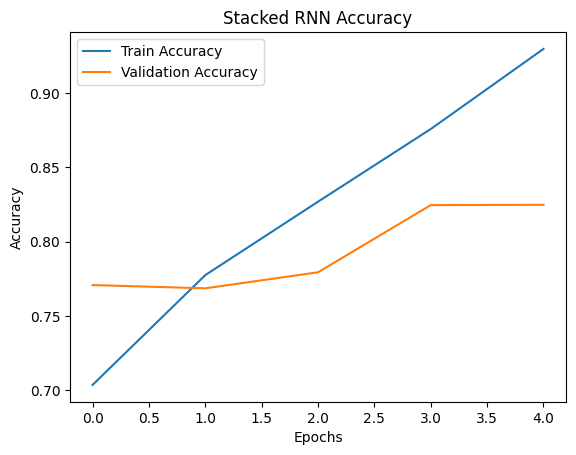

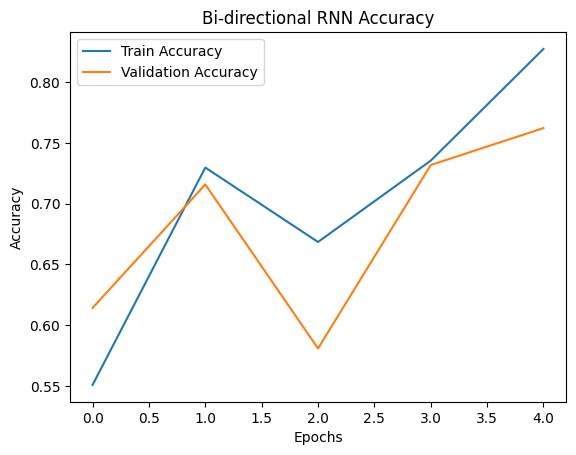

In [23]:
import matplotlib.pyplot as plt

# Plotting accuracy of the models
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Stacked RNN Accuracy
plot_history(stacked_rnn_history, 'Stacked RNN Accuracy')

# Bi-directional RNN Accuracy
plot_history(bidirectional_rnn_history, 'Bi-directional RNN Accuracy')


## **Hybrid Architecture**

In [30]:

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense


max_features = 10000  # Number of words to consider as features
max_len = 200  # Cut texts after this number of words (for padding)

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Padding sequences to ensure that all input sequences have the same length
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Hybrid CNN-RNN Model Architecture
hybrid_model = Sequential()

# Embedding Layer (converts integer sequences to dense vectors)
hybrid_model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))

# CNN Layer: Convolution + Max Pooling
hybrid_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
hybrid_model.add(MaxPooling1D(pool_size=2))

# LSTM Layer
hybrid_model.add(LSTM(units=64))

# Output Layer: Dense for binary classification
hybrid_model.add(Dense(1, activation='sigmoid'))

# Compiling the model
hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the Hybrid CNN-RNN model
hybrid_history = hybrid_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluating the model on test data
test_loss, test_acc = hybrid_model.evaluate(X_test, y_test)
print(f'Hybrid CNN-RNN Test Accuracy: {test_acc:.3f}')



Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 172ms/step - accuracy: 0.6887 - loss: 0.5411 - val_accuracy: 0.8538 - val_loss: 0.3378
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 170ms/step - accuracy: 0.9214 - loss: 0.2122 - val_accuracy: 0.8842 - val_loss: 0.2950
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 167ms/step - accuracy: 0.9591 - loss: 0.1194 - val_accuracy: 0.8452 - val_loss: 0.4103
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 171ms/step - accuracy: 0.9741 - loss: 0.0830 - val_accuracy: 0.8748 - val_loss: 0.3696
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 171ms/step - accuracy: 0.9876 - loss: 0.0461 - val_accuracy: 0.8764 - val_loss: 0.4459
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.8597 - loss: 0.4995
Hybrid CNN-RNN Test Accuracy: 0.860


Epoch 1/5


ValueError: Input 0 of layer "simple_rnn_8" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 1)